アヤメのサンプルデータのロード。

In [82]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=["Species"])
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Speciesを分かりやすく品種名に変更する。

In [83]:
for i in range(len(y)):
    if df.iloc[i, 4] == 0:
        df.iloc[i, 4] = "satosa"
    elif df.iloc[i, 4] == 1:
        df.iloc[i, 4] = "versicolor" 
    elif df.iloc[i, 4] == 2:
        df.iloc[i, 4] = "virginica"
df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,satosa
1,4.9,3.0,1.4,0.2,satosa
2,4.7,3.2,1.3,0.2,satosa
3,4.6,3.1,1.5,0.2,satosa
4,5.0,3.6,1.4,0.2,satosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


2品種のみ取り出す。

In [85]:
df = df[(df['Species']=='satosa') | (df['Species']=='versicolor')]
df_satosa = df[df["Species"]=="satosa"]
df_versicolor = df[df["Species"]=="versicolor"]
df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,satosa
1,4.9,3.0,1.4,0.2,satosa
2,4.7,3.2,1.3,0.2,satosa
3,4.6,3.1,1.5,0.2,satosa
4,5.0,3.6,1.4,0.2,satosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


上記2品種を、petal length と 
sepal width の2つの特徴量で描画する。

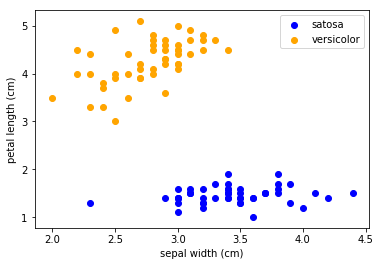

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df_satosa[["sepal width (cm)"]], df_satosa[["petal length (cm)"]], color = "blue", label = "satosa")
plt.scatter(df_versicolor[["sepal width (cm)"]], df_versicolor[["petal length (cm)"]], color = "orange", label = "versicolor")
plt.xlabel("sepal width (cm)")
plt.ylabel("petal length (cm)")

plt.legend()
plt.show()

上記2品種のアヤメのデータを使用してロジスティック回帰を行う。  
```train_test_split(X, y, test_size, random_state```    
第一引数: 特徴行列 X  
第二引数: 目的変数 y  
test_size=: テスト用のデータを何割の大きさにするか  
(test_size=0.3 で、3割をテスト用のデータとして置く)  
random_state=: データを分割する際の乱数のシード値  
(同じ結果が返るように するには0 を指定。ただし普段は指定しない)

In [92]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, 0:4],
    df.iloc[:, 4],
    test_size = 0.3,
    random_state=1
)

model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

各特徴量の係数(重み)を表示する。

In [139]:
result = pd.DataFrame({'sepal length': [model.coef_[0, 0]],
                   'sepal width': [model.coef_[0, 1]],
                   'petal length': [model.coef_[0, 2]],
                   'petal width': [model.coef_[0, 3]],},
                  index=['WAITs'])
result.head()

,sepal length,sepal width,petal length,petal width
WAITs,-0.404828,-1.327606,2.075781,0.957069


もう2つの特徴量のグラフも追加  

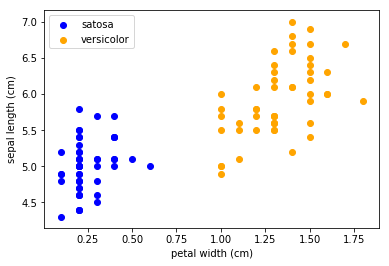

In [142]:
plt.scatter(df_satosa[["petal width (cm)"]], df_satosa[["sepal length (cm)"]], color = "blue", label = "satosa")
plt.scatter(df_versicolor[["petal width (cm)"]], df_versicolor[["sepal length (cm)"]], color = "orange", label = "versicolor")
plt.xlabel("petal width (cm)")
plt.ylabel("sepal length (cm)")

plt.legend()
plt.show()